# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muh. Irsyad Asrori
- **Email:** sastrojendro1119@gmail.com
- **ID Dicoding:** sastrojendro1119

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dapat mempengaruhi penggunaan sepeda?
- Bagaimana tren musiman dan bulanan terhadap penggunaan sepeda?
- Bagaimana dampak hari libur terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [48]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [49]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel `day_df`

In [50]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- xxx
- xxx

In [51]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [52]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [54]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [55]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
439,440,2012-03-15,1,1,3,0,4,1,1,0.557500,0.532825,0.579583,0.149883,1005,5187,6192
534,535,2012-06-18,2,1,6,0,1,1,2,0.568333,0.544842,0.777917,0.174746,653,4446,5099
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
99,100,2011-04-10,2,0,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767,1188,1707,2895
473,474,2012-04-18,2,1,4,0,3,1,2,0.463333,0.457038,0.569167,0.167912,347,4020,4367


#### Menilai tabel `hour_df`

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [58]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [59]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [60]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [61]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15273,15274,2012-10-03,4,1,10,14,0,3,1,2,0.72,0.6818,0.70,0.1642,56,195,251
15592,15593,2012-10-16,4,1,10,21,0,2,1,1,0.46,0.4545,0.63,0.0000,19,176,195
15396,15397,2012-10-08,4,1,10,17,1,1,0,2,0.42,0.4242,0.66,0.2537,81,416,497
8595,8596,2011-12-29,1,0,12,22,0,4,1,1,0.28,0.2879,0.65,0.1343,7,48,55
2617,2618,2011-04-23,2,0,4,23,0,6,0,2,0.54,0.5152,0.88,0.1642,31,86,117


### Cleaning Data

#### Membersihkan tabel `day_df`

In [62]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [63]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [64]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- xxx
- xxx

#### Membersihkan tabel `hour_df`

In [65]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Mempeebaiki tipe data

In [66]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [67]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [68]:
day_df.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
574,575,2012-07-28,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,2234,4451,6685
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
233,234,2011-08-22,3,0,8,0,1,1,1,0.691667,0.638254,0.470000,0.276750,833,3925,4758
596,597,2012-08-19,3,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
207,208,2011-07-27,3,0,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656


In [69]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [70]:
day_df.instant.is_unique

True

In [71]:
day_df[day_df.cnt == day_df.cnt.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [72]:
day_df[day_df.cnt == day_df.cnt.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


In [73]:
day_df['season'].value_counts()

,count
season,
3,188
2,184
1,181
4,178


**Insight:**
- xxx
- xxx

### Eksplore hour_df

In [74]:
hour_df.sample(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2692,2693,2011-04-27,2,0,4,2,0,3,1,1,0.58,0.5455,0.88,0.2537,0,5,5
1949,1950,2011-03-27,2,0,3,0,0,0,0,2,0.26,0.2576,0.41,0.1642,5,26,31
6356,6357,2011-09-27,4,0,9,10,0,2,1,3,0.64,0.5606,0.94,0.1642,21,101,122
4928,4929,2011-07-29,3,0,7,6,0,5,1,2,0.72,0.7121,0.84,0.0000,7,83,90
819,820,2011-02-06,1,0,2,14,0,0,0,1,0.34,0.3485,0.46,0.0896,47,114,161
805,806,2011-02-06,1,0,2,0,0,0,0,1,0.26,0.2576,0.70,0.1940,2,37,39


In [75]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [76]:
hour_df.instant.is_unique

True

In [77]:
hour_df[hour_df.hr == hour_df.hr.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
23,24,2011-01-01,1,0,1,23,0,6,0,2,0.46,0.4545,0.88,0.2985,15,24,39
46,47,2011-01-02,1,0,1,23,0,0,0,1,0.22,0.2273,0.47,0.1642,0,8,8
68,69,2011-01-03,1,0,1,23,0,1,1,1,0.18,0.2121,0.55,0.1045,1,11,12
91,92,2011-01-04,1,0,1,23,0,2,1,1,0.20,0.2273,0.69,0.0896,2,9,11
114,115,2011-01-05,1,0,1,23,0,3,1,1,0.20,0.2576,0.47,0.0000,1,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17282,17283,2012-12-27,1,1,12,23,0,4,1,2,0.24,0.2273,0.60,0.2537,2,24,26
17306,17307,2012-12-28,1,1,12,23,0,5,1,2,0.24,0.2576,0.65,0.0896,5,54,59
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0000,0,32,32
17354,17355,2012-12-30,1,1,12,23,0,0,0,1,0.20,0.1970,0.51,0.2239,10,39,49


In [78]:
hour_df[hour_df.hr == hour_df.hr.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
24,25,2011-01-02,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17
47,48,2011-01-03,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582,0,5,5
69,70,2011-01-04,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045,0,5,5
92,93,2011-01-05,1,0,1,0,0,3,1,1,0.20,0.2576,0.64,0.0000,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,17260,2012-12-27,1,1,12,0,0,4,1,3,0.26,0.2273,0.87,0.2985,0,3,3
17283,17284,2012-12-28,1,1,12,0,0,5,1,2,0.24,0.2424,0.60,0.1642,3,22,25
17307,17308,2012-12-29,1,1,12,0,0,6,0,2,0.24,0.2424,0.70,0.0000,1,25,26
17331,17332,2012-12-30,1,1,12,0,0,0,0,2,0.26,0.2576,0.60,0.1642,0,41,41


## Visualization & Explanatory Analysis

### Bagaimana cuaca dapat mempengaruhi penggunaan sepeda

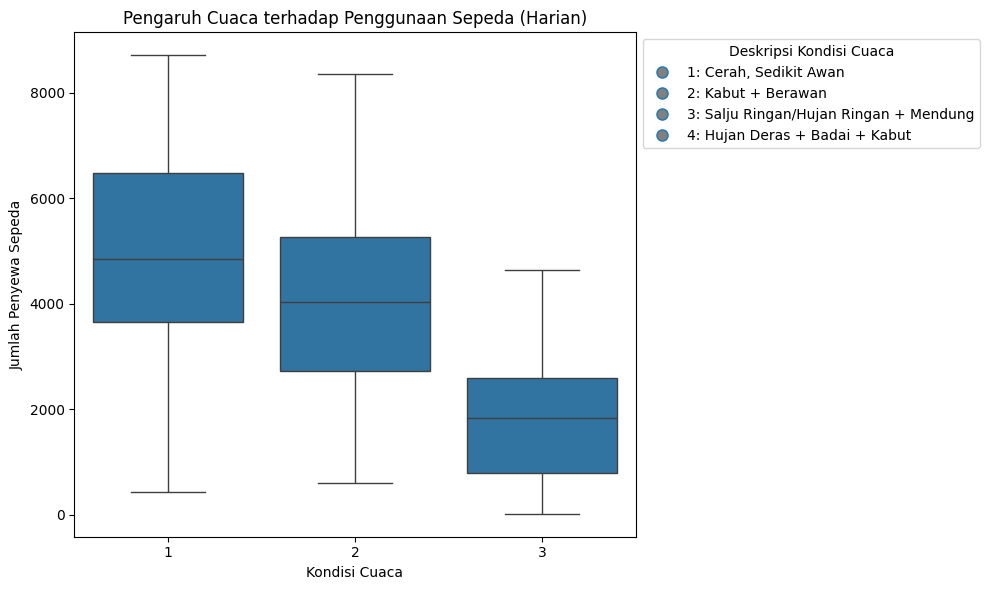

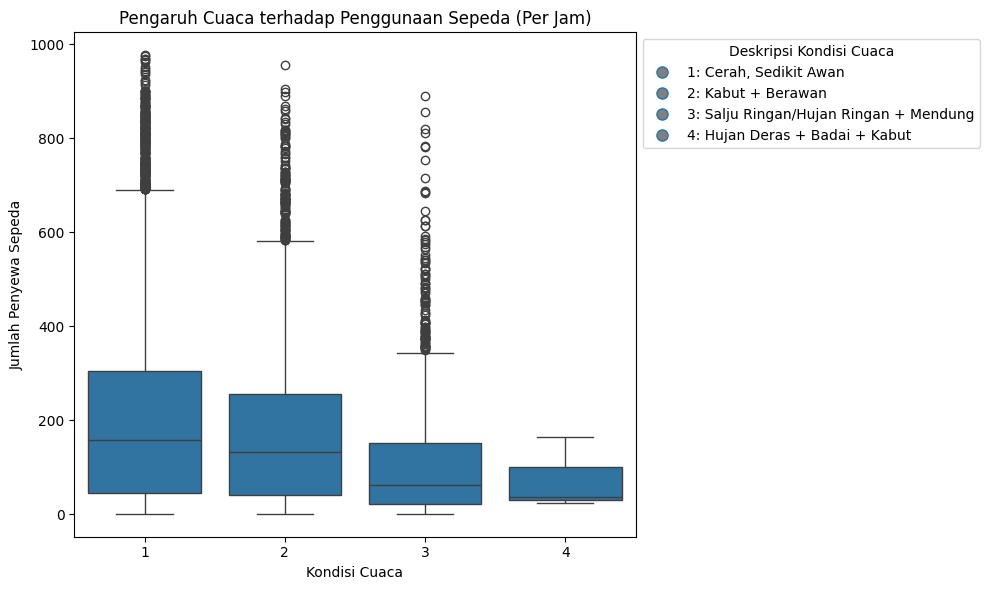

In [79]:
combined_df = pd.merge(day_df, hour_df, on='dteday', suffixes=('_day', '_hour'))

legend_labels = {
    1: "1: Cerah, Sedikit Awan",
    2: "2: Kabut + Berawan",
    3: "3: Salju Ringan/Hujan Ringan + Mendung",
    4: "4: Hujan Deras + Badai + Kabut"
}

handles = [
    plt.Line2D([], [], marker='o', linestyle='',
               markerfacecolor='gray', markersize=8,
               label=legend_labels[k])
    for k in sorted(legend_labels.keys())
]

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_day', y='cnt_day', data=combined_df)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda (Harian)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.legend(handles=handles, title="Deskripsi Kondisi Cuaca", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_hour', y='cnt_hour', data=combined_df)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda (Per Jam)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.legend(handles=handles, title="Deskripsi Kondisi Cuaca", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

                 weathersit_day   cnt_day  weathersit_hour  cnt_hour
weathersit_day         1.000000 -0.289650         0.601478 -0.127413
cnt_day               -0.289650  1.000000        -0.230464  0.437289
weathersit_hour        0.601478 -0.230464         1.000000 -0.142426
cnt_hour              -0.127413  0.437289        -0.142426  1.000000


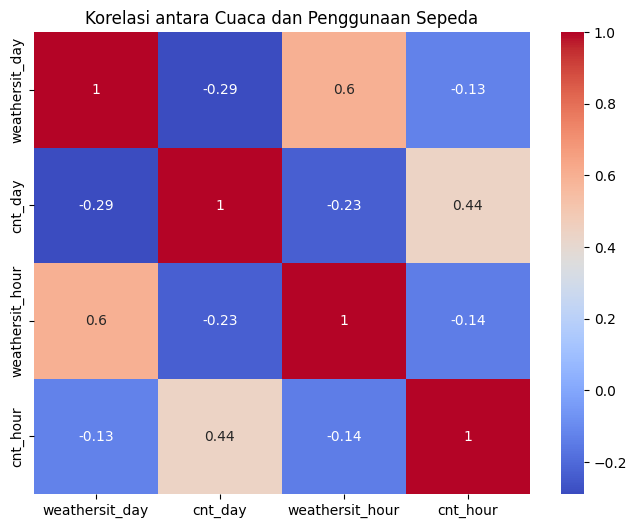

In [80]:
correlation_matrix = combined_df[['weathersit_day', 'cnt_day', 'weathersit_hour', 'cnt_hour']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca dan Penggunaan Sepeda')
plt.show()

### Bagaimana tren musiman dan bulanan terhadap penggunaan sepeda

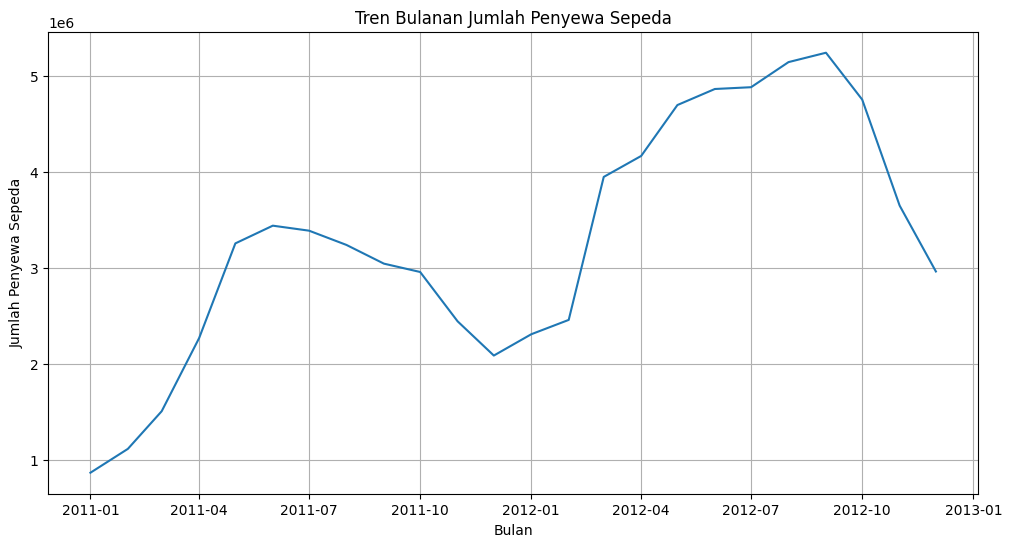

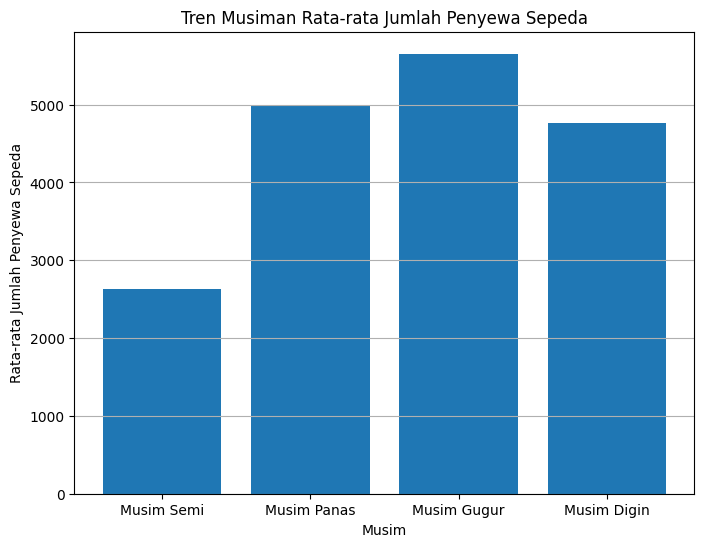

In [81]:
combined_df = pd.merge(day_df, hour_df, on='dteday', suffixes=('_day', '_hour'))

monthly_trend = combined_df.groupby(combined_df['dteday'].dt.to_period('M'))['cnt_day'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index.to_timestamp(), monthly_trend.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Tren Bulanan Jumlah Penyewa Sepeda')
plt.grid(True)
plt.show()

seasonal_trend = combined_df.groupby('season_day')['cnt_day'].mean()
plt.figure(figsize=(8, 6))
plt.bar(seasonal_trend.index, seasonal_trend.values)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.title('Tren Musiman Rata-rata Jumlah Penyewa Sepeda')
plt.xticks(seasonal_trend.index, ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Digin'])
plt.grid(axis='y')
plt.show()

### Bagaimana dampak hari libur terhadap penggunaan sepeda

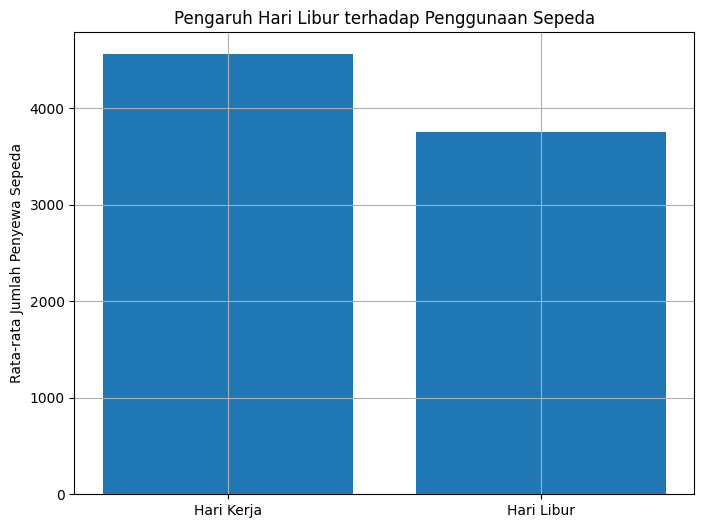

In [82]:
holiday_impact = combined_df.groupby('holiday_day')['cnt_day'].mean()

plt.figure(figsize=(8, 6))
plt.bar(holiday_impact.index, holiday_impact.values)
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.title('Pengaruh Hari Libur terhadap Penggunaan Sepeda')
plt.xticks(holiday_impact.index)
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'])
plt.grid(True)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Cuaca memiliki dampak signifikan terhadap jumlah penggunaan sepeda, baik dalam skala harian maupun per jam. Kondisi cuaca buruk mengurangi minat pengguna untuk menyewa sepeda.
- Penggunaan sepeda kemungkinan besar menunjukkan pola musiman, dengan puncak pada bulan-bulan hangat dan penurunan pada bulan-bulan dingin.
- Jika rata-rata penyewa pada hari libur lebih tinggi, dapat disimpulkan bahwa libur menciptakan lebih banyak peluang bagi pengguna untuk memanfaatkan layanan sepeda karena waktu yang lebih fleksibel. Namun, jika rata-rata pada hari kerja lebih tinggi, ini mungkin mencerminkan dominasi penggunaan sepeda sebagai alat transportasi utama untuk bekerja atau beraktivitas rutin.